Imports

In [2]:
import neo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats


Load the data

In [3]:
# load data fron this directory 
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"
filename_eye2 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5"
filename_eye3 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5"
filename_eye4 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5"
filename_eye5 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5"
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
reader = neo.io.BlackrockIO(filename=filename_eye2)

# Read the data from the file
block_SA = reader.read_block()

# Since there is only one segment, access it directly
segment_SA = block_SA.segments[0]

# Access the first analog signal within this segment
analog_signal_SA = segment_SA.analogsignals[0]

# Example: Print some information about the signal
print(f"Signal shape: {analog_signal_SA.shape}")
print(f"Signal units: {analog_signal_SA.units}")
print(f"Sampling rate: {analog_signal_SA.sampling_rate}")

# Access the signal data as a NumPy array
data_SA = np.asarray(analog_signal_SA.magnitude)
# print(f"First 10 data points: {data[:10]}")

Signal shape: (300300, 32)
Signal units: 1.0 uV
Sampling rate: 30000.0 Hz


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79622/866087868.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', num_channels)


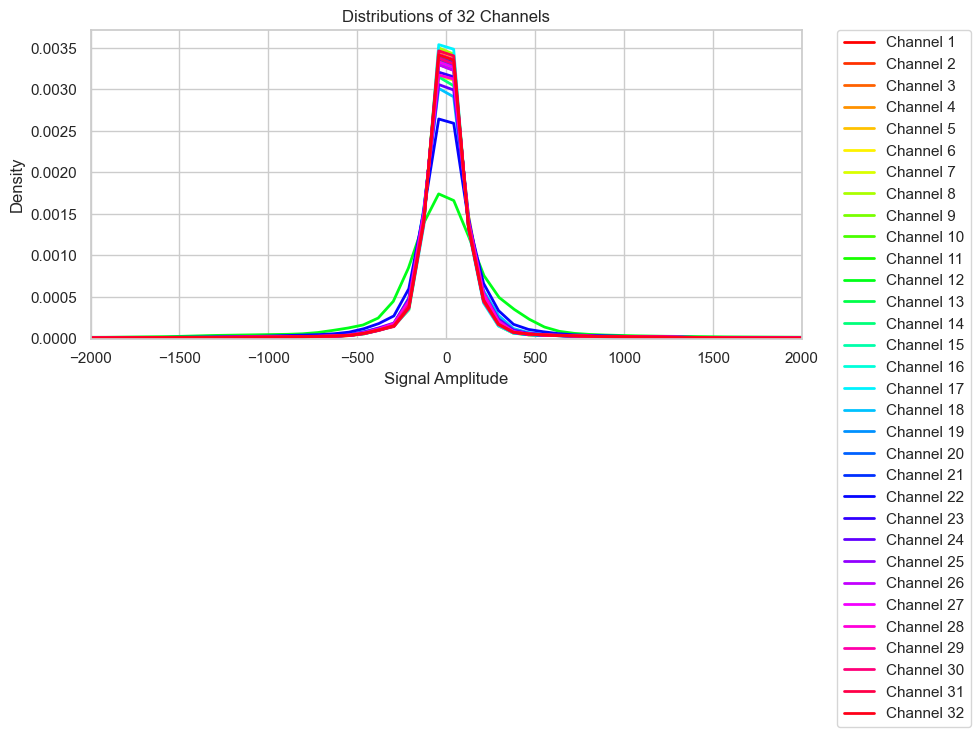

In [4]:
data_SA = np.asarray(analog_signal_SA.magnitude)

# Number of channels (assumed to be 32 in this case)
num_channels = data_SA.shape[1]
cmap = cm.get_cmap('hsv', num_channels)
# Create a figure for the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Loop through each channel and plot the distribution (single color)
for i in range(num_channels):
    color = cmap(i)  # Get a unique color for each channel
    sns.kdeplot(data_SA[:, i], color=color, label=f"Channel {i+1}", lw=2)

# Set x-axis range (adjust according to your data)
plt.xlim(-2000, 2000)  # Example: setting the range from -0.5 to 0.5

# Add labels and title
plt.title('Distributions of 32 Channels')
plt.xlabel('Signal Amplitude')
plt.ylabel('Density')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_77458/2606544167.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', num_channels)


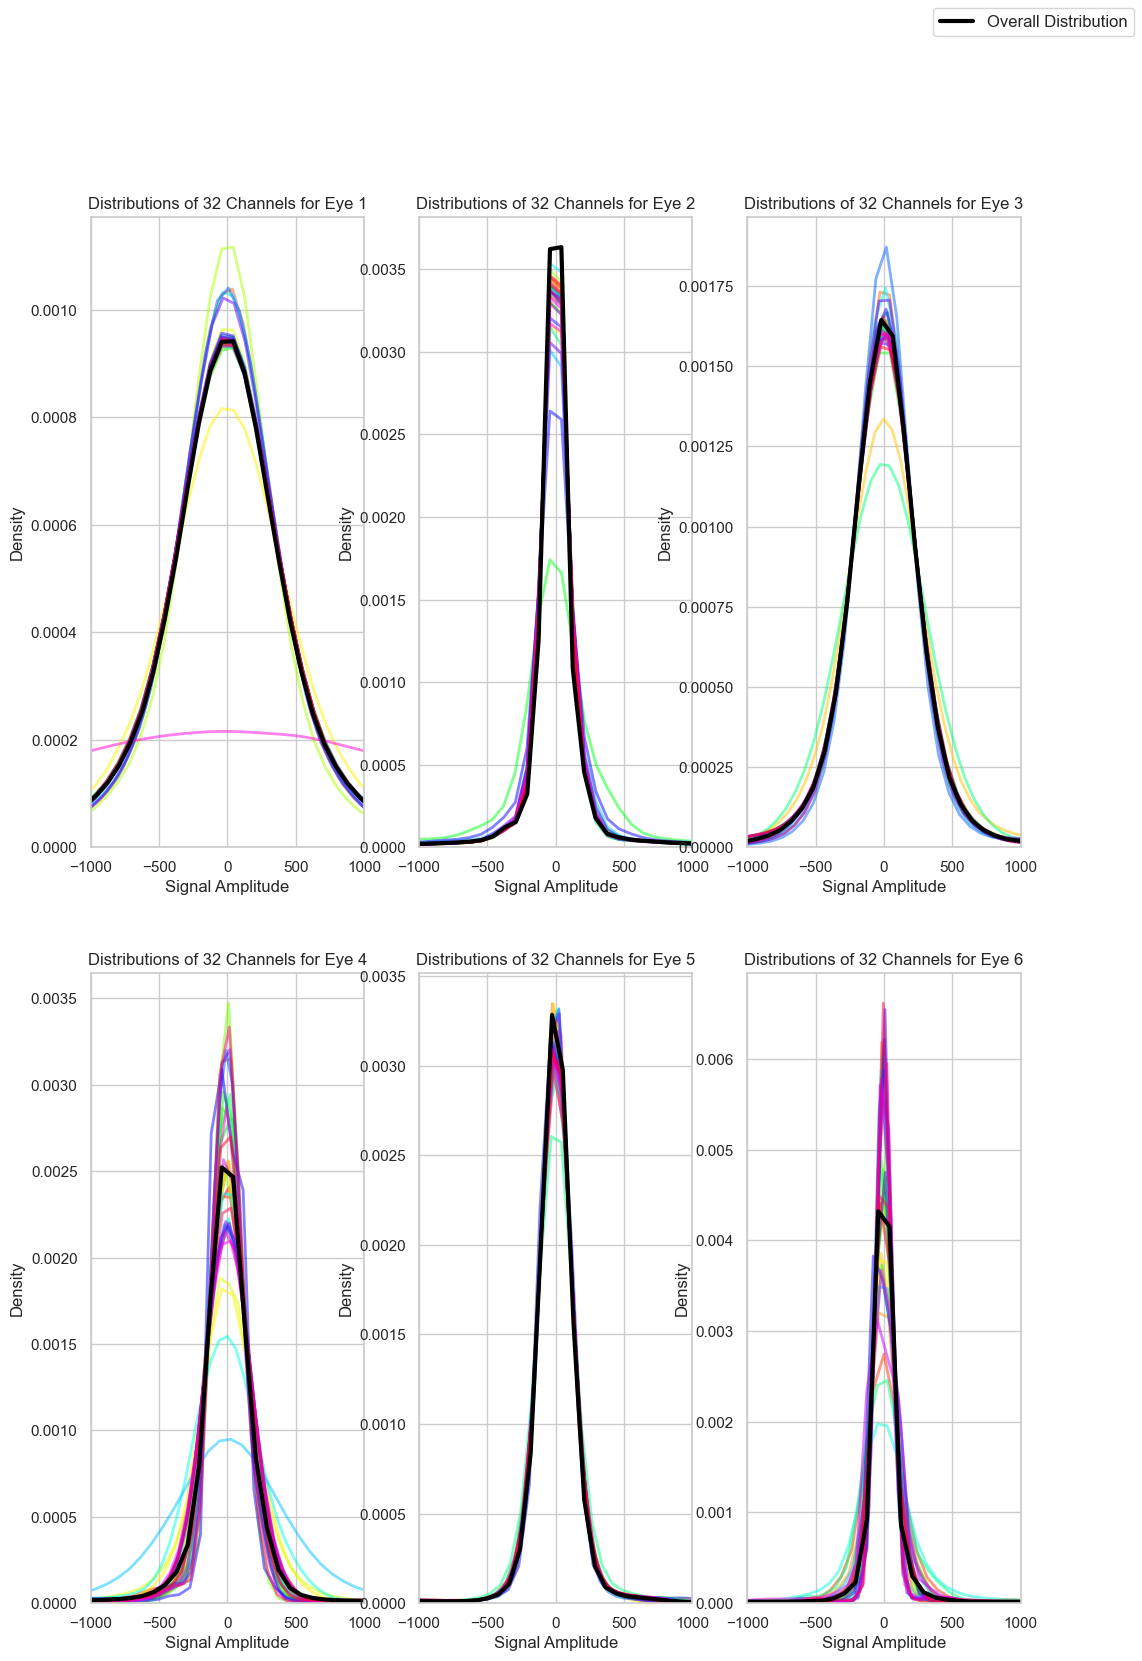

In [49]:
import numpy as np
import neo
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Number of eyes
num_eyes = len(filenames)

# Create a figure for the subplots with a 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 18))
sns.set(style="whitegrid")

# Set the colormap for the channels
num_channels = 32
cmap = cm.get_cmap('hsv', num_channels)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each eye and plot the distributions
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Plot each channel in the current subplot
    for i in range(num_channels):
        color = cmap(i)
        sns.kdeplot(data_SA[:, i], color=color, lw=2, ax=axes[idx], alpha=0.5)

    # Calculate and plot the overall distribution for the current eye
    overall_data = data_SA.flatten()
    sns.kdeplot(overall_data, color='black', lw=3, ax=axes[idx], label='Overall Distribution')

    # Set subplot title and labels
    axes[idx].set_title(f'Distributions of 32 Channels for Eye {idx + 1}')
    axes[idx].set_xlabel('Signal Amplitude')
    axes[idx].set_ylabel('Density')
    axes[idx].set_xlim(-1000, 1000)  # Adjust according to your data

# Create a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='medium')

# Adjust layout
# plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the legend

# Show the plot
plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_77458/1747870030.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', num_channels)


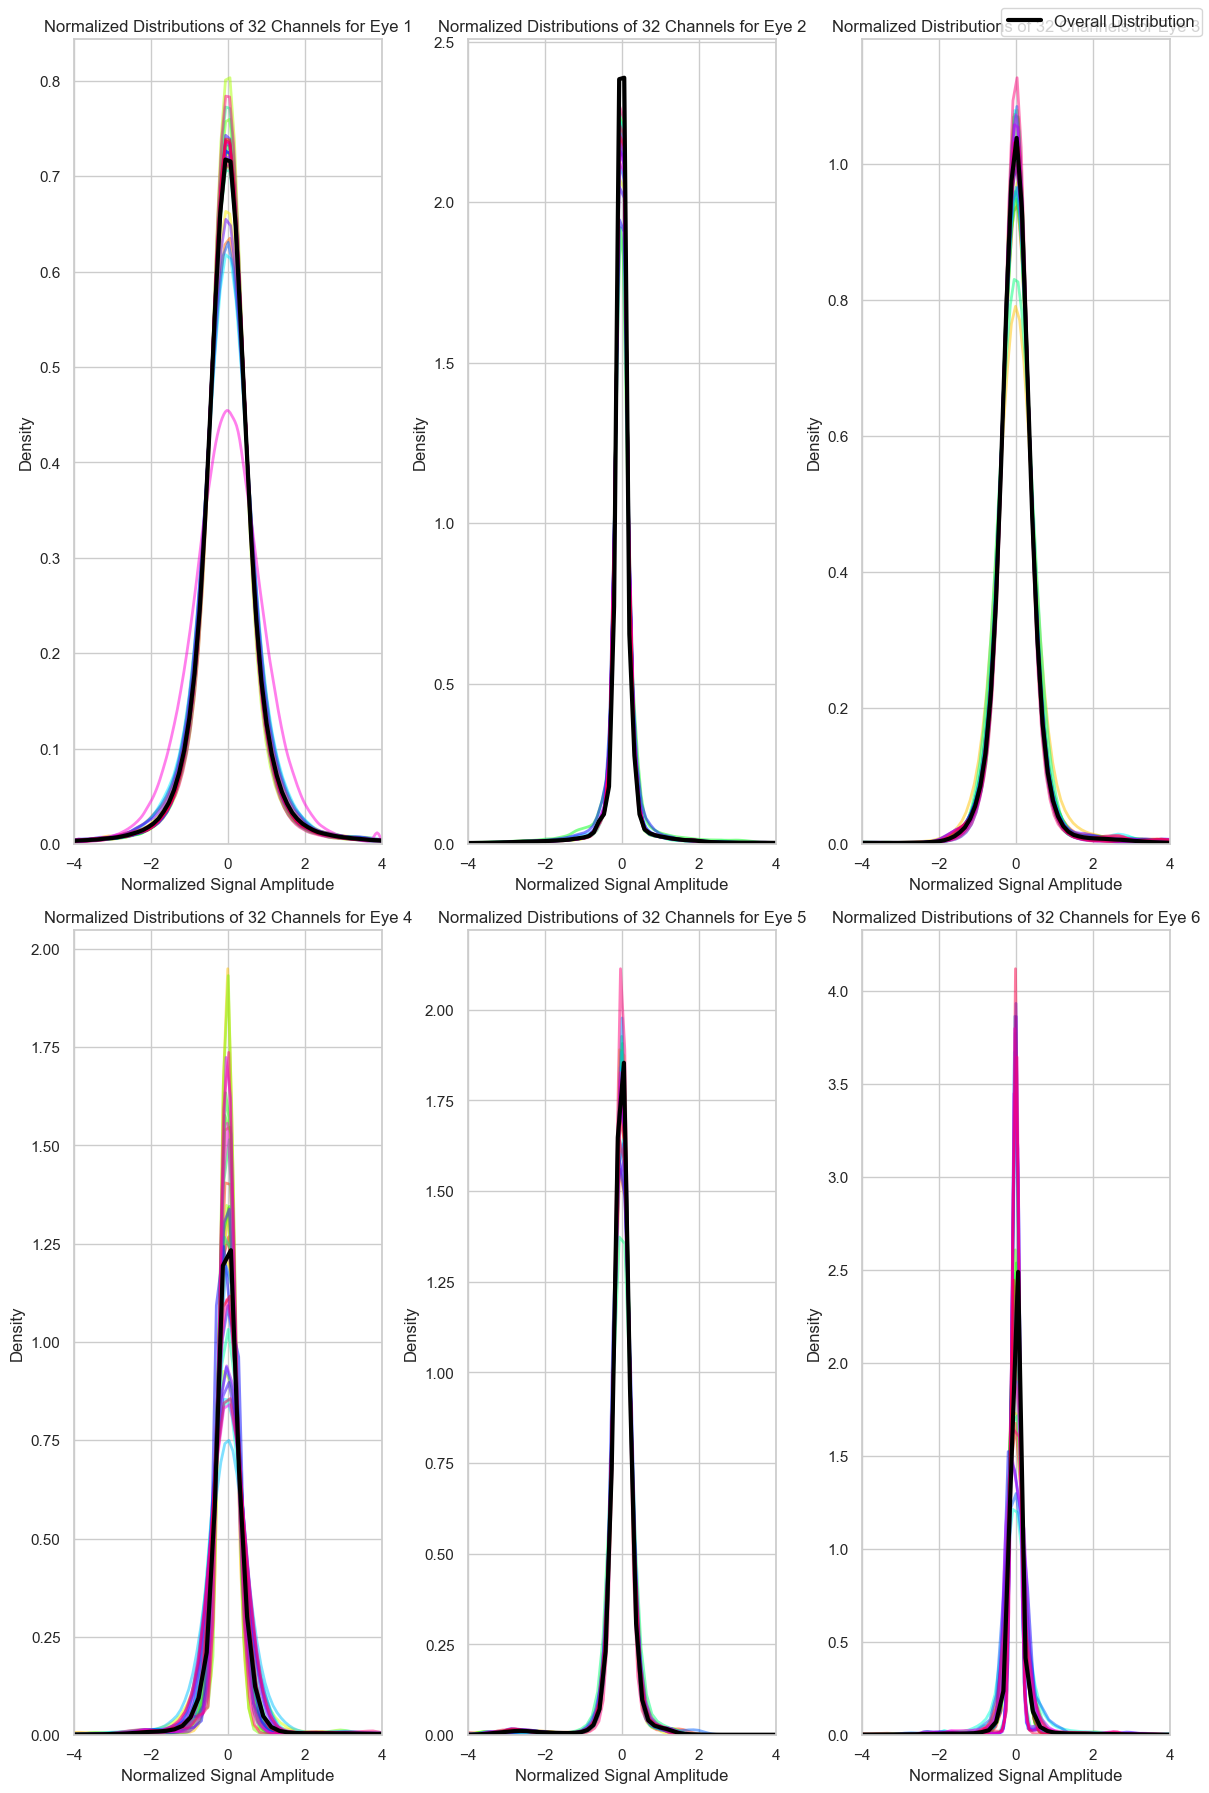

In [69]:
# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Number of eyes
num_eyes = len(filenames)

# Create a figure for the subplots with a 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 18))
sns.set(style="whitegrid")

# Set the colormap for the channels
num_channels = 32
cmap = cm.get_cmap('hsv', num_channels)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each eye and plot the distributions
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Normalize the data channel-wise
    data_SA_normalized = (data_SA - np.mean(data_SA, axis=0)) / np.std(data_SA, axis=0)

    # Plot each channel in the current subplot
    for i in range(num_channels):
        color = cmap(i)
        sns.kdeplot(data_SA_normalized[:, i], color=color, lw=2, ax=axes[idx], alpha=0.5)

    # Calculate and plot the overall distribution for the current eye
    overall_data_normalized = data_SA_normalized.flatten()
    sns.kdeplot(overall_data_normalized, color='black', lw=3, ax=axes[idx], label='Overall Distribution')

    # Set subplot title and labels
    axes[idx].set_title(f'Normalized Distributions of 32 Channels for Eye {idx + 1}')
    axes[idx].set_xlabel('Normalized Signal Amplitude')
    axes[idx].set_ylabel('Density')
    axes[idx].set_xlim(-4, 4)  # Adjust according to normalized data range

# Create a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='medium')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


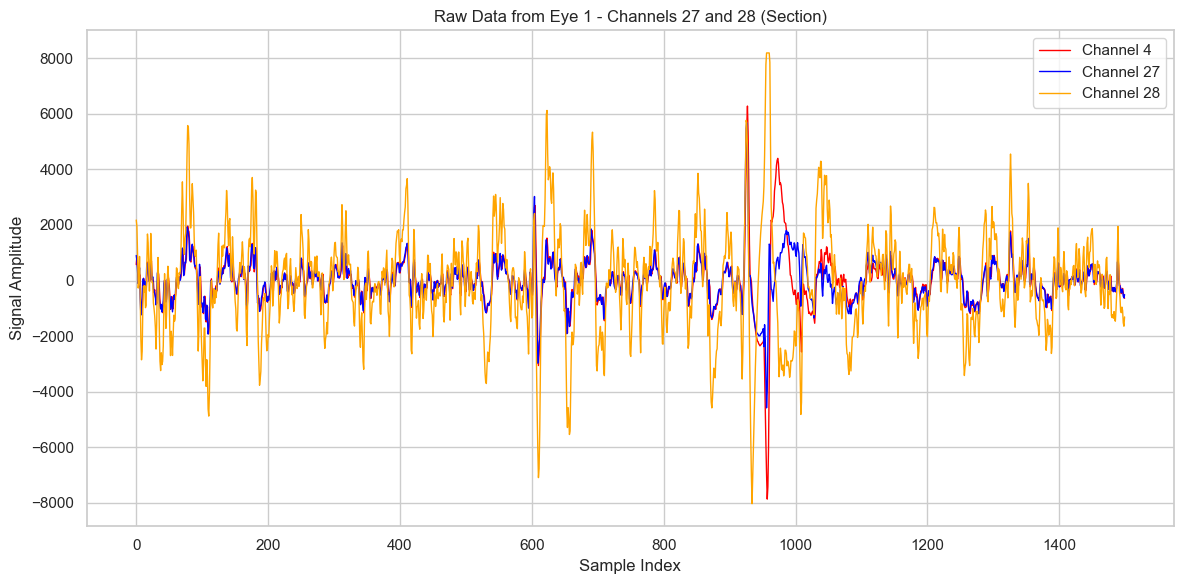

In [74]:
# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Select channels 27 and 28 (zero-indexed)
channel_27 = data_SA[:, 26]  # Channel 27 (index 26)
channel_28 = data_SA[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 0
end_sample = 1500

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot channel 4
plt.plot(range(start_sample, end_sample), data_SA[:, 3][start_sample:end_sample], label='Channel 4', color='red', lw=1)

# Plot channel 27
plt.plot(range(start_sample, end_sample), channel_27[start_sample:end_sample], label='Channel 27', color='blue', lw=1)

# Plot channel 28
plt.plot(range(start_sample, end_sample), channel_28[start_sample:end_sample], label='Channel 28', color='orange', lw=1)

# Add labels and title
plt.title('Raw Data from Eye 1 - Channels 27 and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


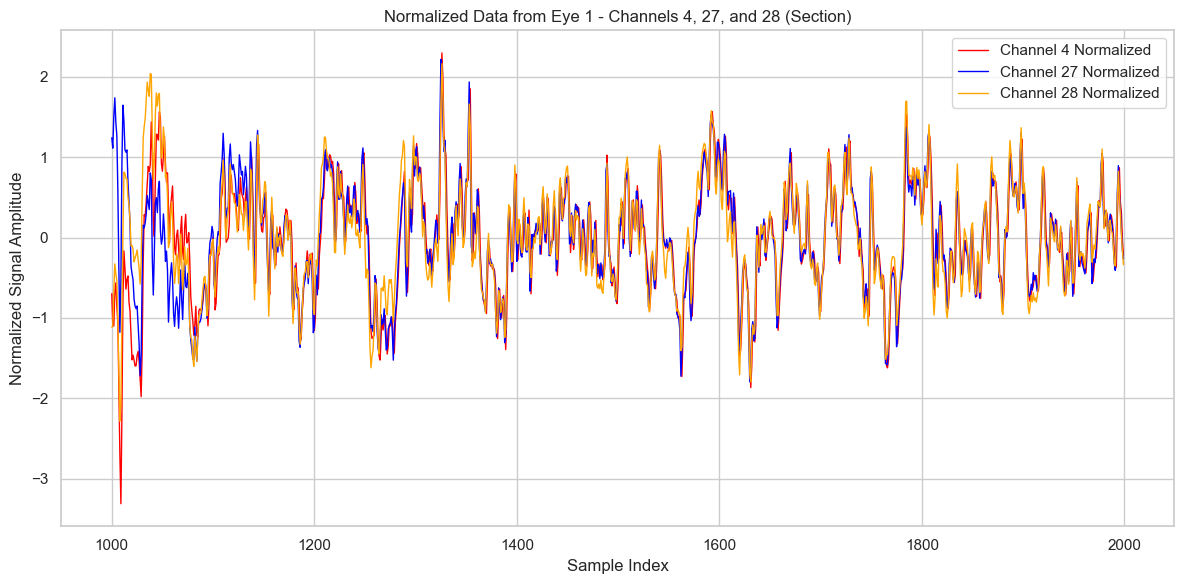

In [79]:
import numpy as np
import neo
import matplotlib.pyplot as plt

# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Normalize each channel (mean normalization within each channel)
data_SA_normalized = (data_SA - np.mean(data_SA, axis=0)) / np.std(data_SA, axis=0, ddof=1)

# Select channels 4, 27, and 28 (zero-indexed)
channel_4_normalized = data_SA_normalized[:, 3]  # Channel 4 (index 3)
channel_27_normalized = data_SA_normalized[:, 26]  # Channel 27 (index 26)
channel_28_normalized = data_SA_normalized[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 1000
end_sample = 2000

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot normalized channel 4
plt.plot(range(start_sample, end_sample), channel_4_normalized[start_sample:end_sample], label='Channel 4 Normalized', color='red', lw=1)

# Plot normalized channel 27
plt.plot(range(start_sample, end_sample), channel_27_normalized[start_sample:end_sample], label='Channel 27 Normalized', color='blue', lw=1)

# Plot normalized channel 28
plt.plot(range(start_sample, end_sample), channel_28_normalized[start_sample:end_sample], label='Channel 28 Normalized', color='orange', lw=1)

# Add labels and title
plt.title('Normalized Data from Eye 1 - Channels 4, 27, and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


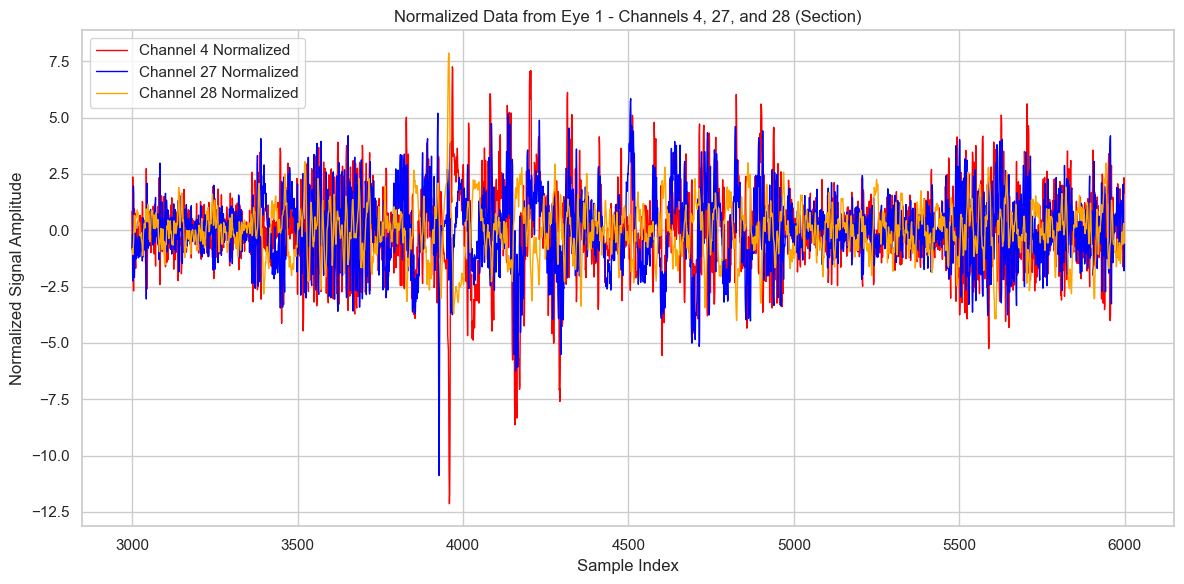

In [86]:
import numpy as np
import neo
import matplotlib.pyplot as plt

# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Calculate the mean across all channels for each time point
mean_across_channels = np.mean(data_SA, axis=1)

# Subtract the mean from each channel
data_SA_centered = data_SA - mean_across_channels[:, np.newaxis]

# Normalize each channel (mean normalization within each channel)
data_SA_normalized = (data_SA_centered - np.mean(data_SA_centered, axis=0)) / np.std(data_SA_centered, axis=0, ddof=1)

# Select channels 4, 27, and 28 (zero-indexed)
channel_4_normalized = data_SA_normalized[:, 3]  # Channel 4 (index 3)
channel_27_normalized = data_SA_normalized[:, 26]  # Channel 27 (index 26)
channel_28_normalized = data_SA_normalized[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 3000
end_sample = 6000

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot normalized channel 4
plt.plot(range(start_sample, end_sample), channel_4_normalized[start_sample:end_sample], label='Channel 4 Normalized', color='red', lw=1)

# Plot normalized channel 27
plt.plot(range(start_sample, end_sample), channel_27_normalized[start_sample:end_sample], label='Channel 27 Normalized', color='blue', lw=1)

# Plot normalized channel 28
plt.plot(range(start_sample, end_sample), channel_28_normalized[start_sample:end_sample], label='Channel 28 Normalized', color='orange', lw=1)

# Add labels and title
plt.title('Normalized Data from Eye 1 - Channels 4, 27, and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
